In [1]:
import sys
sys.path.insert(0,"../")
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Lambda
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy
from keras.optimizers import Adam
import keras
from matplotlib import pyplot
from keras.callbacks import EarlyStopping
import pandas as pd 
from sklearn.preprocessing import LabelEncoder 
import tensorflow as tf
import optimization_lib.full_optimisation as opt
import csv 
import matplotlib.pyplot as plt
import math
import sys
sys.path.insert(0,"../../ElectricityAndSolar/generated_data/")
import numpy as np
from keras.layers import Activation

%matplotlib inline


IndentationError: expected an indented block after function definition on line 261 (full_optimisation.py, line 264)

In [ ]:
data = {
    'load':[],
    'solar':[],
    'cost':[]
}

with open('../ElectricityAndSolar/generated_data/15_minute_averages.csv',newline='') as csvfile:
    data_read = csv.reader(csvfile,delimiter=',',quotechar='|')
    #print(data[0])
    for row in data_read:
        #print(row[0])
        data['solar'].append(eval(row[1]))
        data['load'].append(eval(row[0]))
        data['cost'].append(eval(row[3]))

d=1
hrs = [i/4 for i in range(96*d)]
data['solar'] = data['solar'][80:] + data['solar'][:80]
data['load'] = data['load'][80:] + data['load'][:80]

data_solar = data['solar'] #+ [x*0.8 for x in data['solar']] + [x*1.2 for x in data['solar']]
#data['solar'] += [x*1.2 for x in data['solar']]

data_load = data['load'] #+ [x*0.8 for x in data['load']] + [x*1.2 for x in data['load']]
#data['load'] += [x*1.2 for x in data['load']]

#data['cost'] += [x*0.8 for x in data['cost']]
#data['cost'] += [x*1.2 for x in data['cost']]
print(len(data_load))
storage_capacity = 5000 # in Wh
batt_power = 5000 #in W

systems = []
batteries=[]
batteries_real = []
for i in range(100):
    results = opt.optimalSystemDescription(data_solar,data_load,40,40, batt_power,storage_capacity,soc0=40,deviate=0,deep_discharge_limit=10,days=d)
    #for i in range(results.N):
    #  results.constraints.append(results.E[i] <= 280)

    results.cost = []
    #results.disableExport()
    results.enableBatteryExchangeLimit()

    systems.append(results)


96


In [ ]:
i=0
for x in systems:
    x.optimize("absEnergy")

    batteries.append(x.optimal_results.battery_stpts)
    batteries_real.append(x.optimal_results_real.battery_stpts)
    i=i+1
    print("optimizing ",i)



optimizing  1
optimizing  2
optimizing  3
optimizing  4
optimizing  5
optimizing  6
optimizing  7
optimizing  8
optimizing  9
optimizing  10
optimizing  11
optimizing  12
optimizing  13
optimizing  14
optimizing  15
optimizing  16
optimizing  17
optimizing  18
optimizing  19
optimizing  20
optimizing  21
optimizing  22
optimizing  23
optimizing  24
optimizing  25
optimizing  26
optimizing  27
optimizing  28
optimizing  29
optimizing  30
optimizing  31
optimizing  32
optimizing  33
optimizing  34
optimizing  35
optimizing  36
optimizing  37
optimizing  38
optimizing  39
optimizing  40
optimizing  41
optimizing  42
optimizing  43
optimizing  44
optimizing  45
optimizing  46
optimizing  47
optimizing  48
optimizing  49
optimizing  50
optimizing  51
optimizing  52
optimizing  53
optimizing  54
optimizing  55
optimizing  56
optimizing  57
optimizing  58
optimizing  59
optimizing  60
optimizing  61
optimizing  62
optimizing  63
optimizing  64
optimizing  65
optimizing  66
optimizing  67
opti

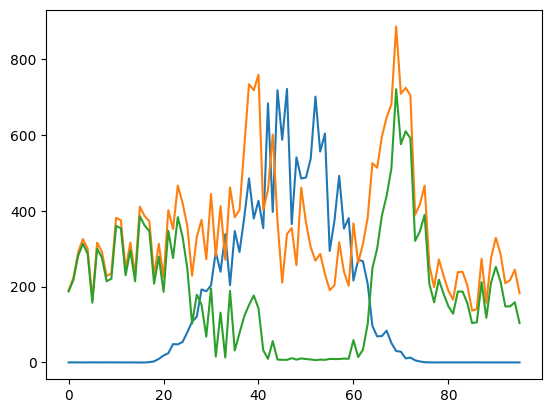

-6.110667527536862e-13


In [ ]:
plt.plot(systems[0].solar_real)
plt.plot(systems[0].load_real)
plt.plot(systems[0].optimal_results_real.grid_data.grid_import)
plt.show()
print(sum(batteries_real[0]))

In [ ]:
xtrain = [x.solar_real + x.load_real for x in systems[:50]]
ytrain = [x.optimal_results_real.battery_stpts for x in systems[:50]]

xval = [x.solar_real+ x.load_real for x in systems[50:]]
yval = [x.optimal_results_real.battery_stpts for x in systems[50:]]

xtrain = np.array(xtrain)
ytrain = np.array(ytrain)
xval = np.array(xval)
yval = np.array(yval)

func =lambda x : x**3/(1+x**2)

model = Sequential()
model.add(Dense(192,input_dim = 192,activation=func))
model.add(Dense(192*3, activation=func))
model.add(Dense(192*3, activation=func))
model.add(Dense(192*3, activation=func))
model.add(Dense(192*3, activation=func))
model.add(Dense(192*3, activation=func))
model.add(Dense(192*3, activation=func))

model.add(Dense(96, activation="linear"))
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=1e-3))
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

#history = model.fit(xtrain, ytrain, validation_data=(xval, yval), epochs=10000000, batch_size=100, verbose=0, callbacks=[es])

C:\Users\chitt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(xtrain, ytrain, validation_data=(xval, yval), epochs=10000000, batch_size=100, verbose=1, callbacks=[es])

Epoch 1/10000000
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 85144.7734 - val_loss: 698322.9375
Epoch 2/10000000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 698579.9375 - val_loss: 266895.1562
Epoch 3/10000000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 266738.4688 - val_loss: 47037.9297
Epoch 4/10000000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 47480.0469 - val_loss: 40602.3008
Epoch 5/10000000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 39668.4414 - val_loss: 30990.2441
Epoch 6/10000000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 29111.4844 - val_loss: 27304.2949
Epoch 7/10000000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 25617.3398 - val_loss: 28552.6309
Epoch 8/10000000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 27415.4043 - val_loss: 21419.9922
Epoch 9/10000000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 20406.0684 - val_loss: 16277.6348
Epoch 10/10000000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 14936.4102 - val_loss: 16635.7480
Epoch 11/10000000
1/1 ━━━━━

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


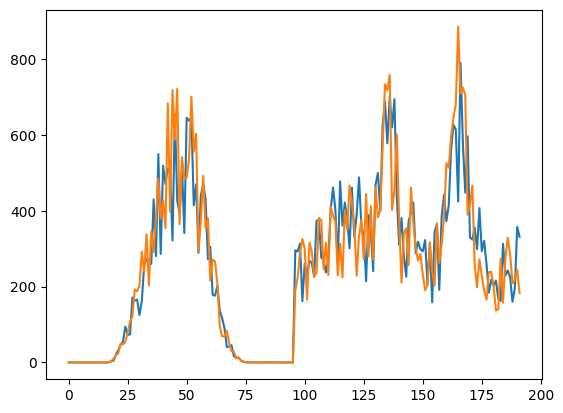

In [ ]:
plt.plot(xval[0])
plt.plot(xtrain[0])
PredTestSet = model.predict(xtrain)
xval = [x.solar + x.load for x in systems[50:]]
PredValSet = model.predict(np.array(xval))
test_optimal_system = opt.optimalSystemDescription(systems[0].solar,systems[0].load,0,0, batt_power,storage_capacity,soc0=40,deviate=0,deep_discharge_limit=10,days=d)
test_optimal_system.enableBatteryExchangeLimit()
test_optimal_system.optimize("absEnergy")

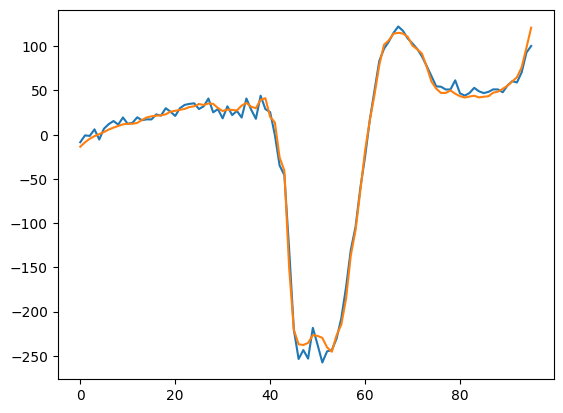

In [ ]:
plt.plot(PredValSet[1])
plt.plot(test_optimal_system.optimal_results.battery_stpts)
plt.show()

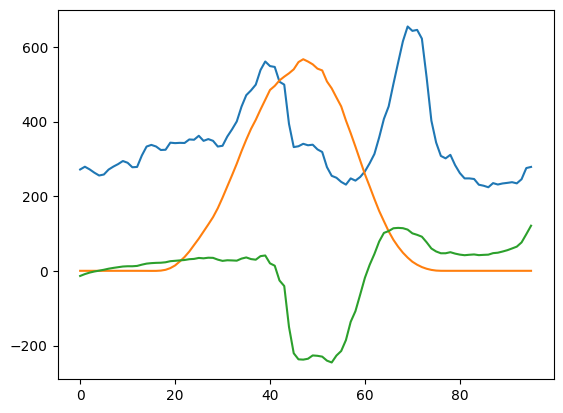

In [ ]:
plt.plot(systems[0].load)
plt.plot(systems[0].solar)
plt.plot(systems[0].optimal_results.battery_stpts)

In [ ]:
from scipy.fft import fft


load_arr =  np.array(systems[0].load)
solar_arr =  np.array(systems[0].solar)
battery_arr =  np.array(systems[0].optimal_results.battery_stpts)
diff = load_arr - solar_arr

fft_load = fft(load_arr)
fft_solar = fft(solar_arr)
fft_diff = fft(diff)
fft_battery = fft(battery_arr)
ml_data = fft(np.array(PredValSet[0]))

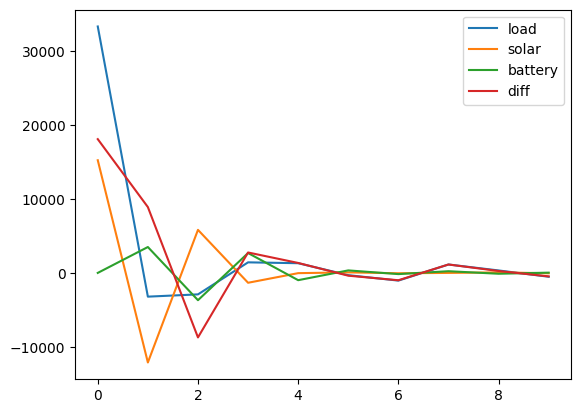

In [ ]:

plt.plot(fft_load[:10],label = 'load')
plt.plot(fft_solar[:10],label='solar')
plt.plot(fft_battery[:10],label = 'battery')
plt.plot(fft_diff[:10],label = 'diff')
plt.legend()
plt.show()